In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data_df0 = pd.read_csv('/Users/pjw22/Desktop/BU Course/730/proj/absolute return since inception.csv')   # 


In [29]:
data_df0['Naive'] = data_df0['Naive'] + 1
data_df0['GMV'] = data_df0['GMV'] + 1
data_df0['HRP'] = data_df0['HRP'] + 1
data_df0['RP'] = data_df0['RP'] + 1
data_df0['SZCZ'] = data_df0['SZCZ'] + 1

In [30]:
data_df0

,Unnamed: 0,Naive,GMV,HRP,RP,SZCZ
0,2013-03-01,1.001512,1.002636,1.002636,1.002156,1.000903
1,2013-03-04,0.946438,0.944502,0.944502,0.945318,0.947966
2,2013-03-05,0.963026,0.959949,0.959949,0.961257,0.968876
3,2013-03-06,0.958105,0.955303,0.955303,0.956499,0.978191
4,2013-03-07,0.960110,0.956723,0.956723,0.958161,0.974304
...,...,...,...,...,...,...
2425,2023-02-21,2.122740,1.884377,1.884376,1.989978,1.241372
2426,2023-02-22,2.108997,1.871923,1.871922,1.976915,1.234269
2427,2023-02-23,2.118971,1.880629,1.880628,1.986212,1.232628
2428,2023-02-24,2.102788,1.866922,1.866921,1.971395,1.222583


In [31]:
date_name = 'Unnamed: 0'
value_names = ['Naive','GMV','HRP' ,'RP','SZCZ']
frequency = 1

In [32]:


data_df0.head()

,Unnamed: 0,Naive,GMV,HRP,RP,SZCZ
0,2013-03-01,1.001512,1.002636,1.002636,1.002156,1.000903
1,2013-03-04,0.946438,0.944502,0.944502,0.945318,0.947966
2,2013-03-05,0.963026,0.959949,0.959949,0.961257,0.968876
3,2013-03-06,0.958105,0.955303,0.955303,0.956499,0.978191
4,2013-03-07,0.960110,0.956723,0.956723,0.958161,0.974304


In [34]:


start_date = data_df0[date_name].iloc[0]
end_date = data_df0[date_name].iloc[-1] #

print(data_df0[date_name].iloc[0], end_date)

2013-03-01 2023-02-27


In [35]:
data_df1 = data_df0

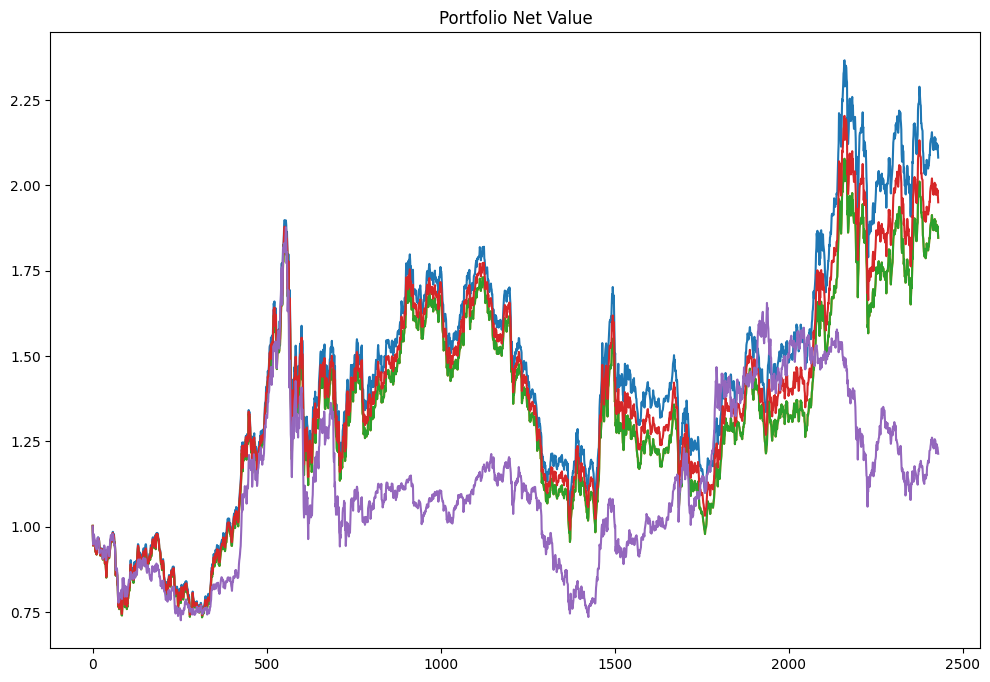

In [36]:
plt.figure(figsize=(12,8))
plt.title('Portfolio Net Value') 
for i in range(5):
    value_name = value_names[i]
    plt.plot(data_df1[value_name])

plt.show()

In [37]:


for j in range(5):

    value_name = value_names[j]

    max_drawdown = 0
    max_drawdown_index = 0

    max_value = data_df1[value_name].iloc[0]
    max_value_index = 0
    max_drawdown_start_index = 0

    revover_date_index = None
    flag_recover = True

    for i in range(data_df1.shape[0]):

        if data_df1[value_name].iloc[i] > max_value:
            max_value = data_df1[value_name].iloc[i]
            max_value_index = i

        draw_down = (max_value - data_df1[value_name].iloc[i]) / max_value

        if draw_down > max_drawdown:
            max_drawdown = draw_down
            max_drawdown_index = i
            max_drawdown_start_index = max_value_index
            flag_recover = False

        if data_df1[value_name].iloc[i] > data_df1[value_name].iloc[max_drawdown_start_index] and not flag_recover:
            revover_date_index = i
            flag_recover = True



    print(value_name)
    print(max_drawdown, data_df1[date_name].iloc[max_drawdown_start_index], data_df1[date_name].iloc[max_drawdown_index], data_df1[date_name].iloc[revover_date_index], (revover_date_index-max_drawdown_index)*frequency)

Naive
0.45602684682522604 2015-06-08 2018-10-18 2021-11-22 752
GMV
0.48656734542545915 2015-06-08 2018-10-18 2021-12-20 772
HRP
0.48656658983818707 2015-06-08 2018-10-18 2021-12-20 772
RP
0.47289189359879663 2015-06-08 2018-10-18 2021-12-15 769
SZCZ
0.6082808705939882 2015-06-12 2019-01-03 2014-12-04 -996


In [40]:
return_yoe = []

for j in range(4):

    value_name = value_names[j]
    return_yoe.append((data_df1[value_name].iloc[-1]/data_df1[value_name].iloc[0])**(246/(data_df1.shape[0]*frequency))-1)
    
return_yoe

[0.07686262633282404,
 0.06376088586950002,
 0.06376085862900482,
 0.06972919821335832]

In [38]:
bench_return_yoe = (data_df1['SZCZ'].iloc[-1]/data_df1['SZCZ'].iloc[0])**(246/(data_df1.shape[0]*frequency))-1
bench_return_yoe

0.01970792797991816

In [42]:
for j in range(4):   

    value_name = value_names[j]

    data_df1['return'+value_name] = data_df1[value_name]/data_df1[value_name].shift(1) - 1
    data_df1['index return'] = data_df1['SZCZ']/data_df1['SZCZ'].shift(1) - 1
    data_df1['excess return'+value_name] = ((data_df1['return'+value_name] + 1) / (data_df1['index return'] + 1)) - 1
    data_df1['excess return net value '+value_name] = ((data_df1[value_name]/data_df1[value_name].iloc[0]) / (data_df1['SZCZ']/data_df1['SZCZ'].iloc[0]))

    

data_df1.drop(index=0, inplace=True)
data_df1.reset_index(drop=True, inplace=True)


In [43]:
data_df1

,Unnamed: 0,Naive,GMV,HRP,RP,SZCZ,return,returnNaive,index return,excess returnNaive,excess return net value Naive,returnGMV,excess returnGMV,excess return net value GMV,returnHRP,excess returnHRP,excess return net value HRP,returnRP,excess returnRP,excess return net value RP
0,2013-03-04,0.946438,0.944502,0.944502,0.945318,0.947966,-0.054991,-0.054991,-0.052890,-0.002218,0.997782,-0.057980,-0.005375,0.994625,-0.057980,-0.005375,0.994625,-0.056716,-0.004040,0.995960
1,2013-03-05,0.963026,0.959949,0.959949,0.961257,0.968876,0.017526,0.017526,0.022058,-0.004434,0.993357,0.016354,-0.005580,0.989075,0.016354,-0.005580,0.989075,0.016861,-0.005084,0.990896
2,2013-03-06,0.958105,0.955303,0.955303,0.956499,0.978191,-0.005110,-0.005110,0.009615,-0.014584,0.978870,-0.004840,-0.014317,0.974914,-0.004840,-0.014317,0.974914,-0.004950,-0.014426,0.976602
3,2013-03-07,0.960110,0.956723,0.956723,0.958161,0.974304,0.002093,0.002093,-0.003973,0.006091,0.984832,0.001487,0.005482,0.980259,0.001487,0.005482,0.980259,0.001738,0.005734,0.982202
4,2013-03-08,0.952162,0.949091,0.949091,0.950378,0.963117,-0.008278,-0.008278,-0.011482,0.003241,0.988024,-0.007977,0.003546,0.983734,-0.007977,0.003546,0.983734,-0.008123,0.003398,0.985539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2023-02-21,2.122740,1.884377,1.884376,1.989978,1.241372,0.004182,0.004182,0.001211,0.002967,1.708956,0.004719,0.003504,1.515357,0.004719,0.003504,1.515356,0.004484,0.003269,1.601043
2425,2023-02-22,2.108997,1.871923,1.871922,1.976915,1.234269,-0.006474,-0.006474,-0.005722,-0.000757,1.707662,-0.006609,-0.000892,1.514005,-0.006609,-0.000892,1.514004,-0.006565,-0.000848,1.599686
2426,2023-02-23,2.118971,1.880629,1.880628,1.986212,1.232628,0.004729,0.004729,-0.001329,0.006066,1.718021,0.004650,0.005987,1.523070,0.004650,0.005988,1.523070,0.004703,0.006040,1.609349
2427,2023-02-24,2.102788,1.866922,1.866921,1.971395,1.222583,-0.007637,-0.007637,-0.008150,0.000517,1.718909,-0.007288,0.000868,1.524392,-0.007288,0.000868,1.524392,-0.007460,0.000695,1.610468


In [44]:
# 超额年化收益率 ? 
excess_return_yoe = []

# excess_return_yoe = ((data_df1[value_name].iloc[-1]/data_df1[value_name].iloc[0]) / (data_df1['close'].iloc[-1]/data_df1['close'].iloc[0]))**(246/data_df1.shape[0])-1

for j in range(4):   

    value_name = value_names[j]
    excess_return_yoe.append((data_df1['excess return net value '+value_name].iloc[-1]**(246/(data_df1.shape[0]*frequency))) - 1)   #    data_df1['excess return net value'].iloc[-1]-1


excess_return_yoe

[0.05607377822322057,
 0.043219709613554036,
 0.04321968288807376,
 0.049075190516778555]

In [46]:

excess_vol_yoe = []
for j in range(4):   

    value_name = value_names[j]
    excess_vol_yoe.append(data_df1['excess return'+value_name].std() * np.sqrt(246))



excess_vol_yoe

[0.1668930324576017,
 0.16966142378470872,
 0.1696614427290476,
 0.1681203666910821]

In [47]:

rate = 0.03 

excess_sharp = []

for j in range(4):   

    excess_sharp.append((excess_return_yoe[j]-rate) / excess_vol_yoe[j])
    
excess_sharp

[0.1562304779251014,
 0.0779181815091281,
 0.07791801528639503,
 0.11346150910929695]

In [48]:


for j in range(4):   

    value_name = value_names[j]

    max_drawdown_ = 0
    max_drawdown_index_ = 0

    max_value_ = 1
    max_value_index_ = 0
    max_drawdown_start_index_ = 0

    revover_date_index_ = None
    flag_recover_ = True

    for i in range(data_df1.shape[0]):

        if data_df1['excess return net value '+value_name].iloc[i] > max_value_:
            max_value_ = data_df1['excess return net value '+value_name].iloc[i]
            max_value_index_ = i

        draw_down_ = (max_value_ - data_df1['excess return net value '+value_name].iloc[i]) / max_value_

        if draw_down_ > max_drawdown_:
            max_drawdown_ = draw_down_
            max_drawdown_index_ = i
            max_drawdown_start_index_ = max_value_index_
            flag_recover_ = False

        if data_df1['excess return net value '+value_name].iloc[i] > data_df1['excess return net value '+value_name].iloc[max_drawdown_start_index_] and not flag_recover_:
            revover_date_index_ = i
            flag_recover_ = True
            #print(max_drawdown_start_index, max_drawdown_index, revover_date_index)


    print(value_name)
    print(max_drawdown_, data_df1[date_name].iloc[max_drawdown_start_index_], data_df1[date_name].iloc[max_drawdown_index_], data_df1[date_name].iloc[revover_date_index_], (revover_date_index_-max_drawdown_index_)*frequency)

Naive
0.4975865108944364 2017-02-14 2021-02-10 2022-03-22 266
GMV
0.5224210223187993 2017-02-14 2021-02-10 2022-09-05 379
HRP
0.5224236067284996 2017-02-14 2021-02-10 2022-09-05 379
RP
0.5116451470963861 2017-02-14 2021-02-10 2022-03-28 270


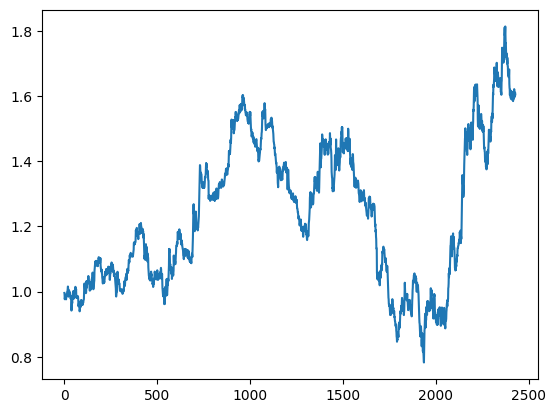

In [49]:
plt.plot(data_df1['excess return net value '+value_name])